In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [82]:
data = pd.read_excel('data.xlsx')
data

,X,Y
0,609,241
1,629,222
2,620,233
3,564,207
4,645,247
5,493,189
6,606,226
7,660,240
8,630,215
9,672,231


In [83]:
x_col = data[['X']] # class pandas.core.series.Series
y_col = data[['Y']] # class pandas.core.series.Series

In [84]:
# Create an instance of the Generator object
rng = np.random.default_rng()

# Choose some index to split the data,
test_index = rng.integers(low=0, high=len(x_col), size=2)
test_index

array([16,  1], dtype=int64)

In [85]:
test_data = np.array([x_col.iloc[test_index]])
test_data = test_data.reshape(-1, 1)
print(test_data)

[[755]
 [629]]


In [86]:
train_data = np.array([x_col.drop(test_index)])
train_data = train_data.reshape(-1, 1)
print(train_data)

[[609]
 [620]
 [564]
 [645]
 [493]
 [606]
 [660]
 [630]
 [672]
 [778]
 [616]
 [727]
 [810]
 [778]
 [823]
 [710]
 [701]
 [803]
 [855]
 [838]
 [830]
 [864]
 [635]
 [565]
 [562]
 [580]
 [596]
 [597]
 [636]
 [559]
 [615]
 [740]
 [677]
 [675]
 [629]
 [692]
 [710]
 [730]
 [763]
 [686]
 [717]
 [737]
 [816]]


In [87]:
train_target = np.array([y_col.drop(test_index)])
train_target = train_target.reshape(-1, 1)
print(train_target)

[[241]
 [233]
 [207]
 [247]
 [189]
 [226]
 [240]
 [215]
 [231]
 [263]
 [220]
 [271]
 [284]
 [279]
 [272]
 [278]
 [238]
 [255]
 [308]
 [281]
 [288]
 [306]
 [236]
 [204]
 [216]
 [225]
 [220]
 [219]
 [201]
 [213]
 [228]
 [234]
 [237]
 [217]
 [211]
 [238]
 [221]
 [281]
 [292]
 [251]
 [231]
 [275]
 [275]]


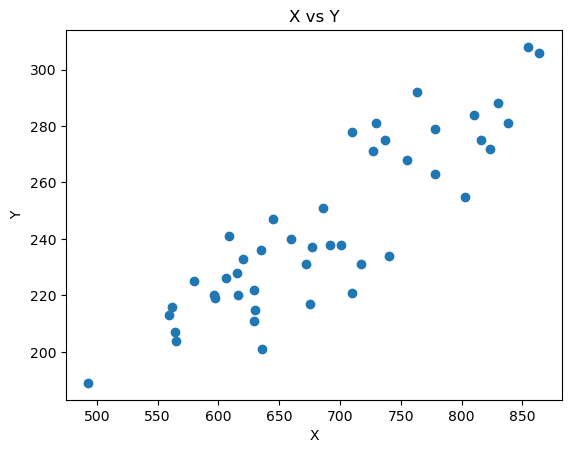

In [88]:
plt.scatter(x_col, y_col)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('X vs Y')
plt.show()

In [89]:
classifier = linear_model.LinearRegression()
classifier.fit(train_data, train_target )

LinearRegression()

In [90]:
# y = w0 + w1 * x1
# target = coef_ * feature + intercept_
w = classifier.coef_[0]
b = classifier.intercept_
print('w = ', w)
print('b = ', b)

w =  [0.28596073]
b =  [47.60805789]


In [91]:
# Fitting line
x0 = np.linspace(500, 850, 2, endpoint=True)
y0 = (w * x0) + b
print('x0 : ', x0 )
print('xy : ', y0 )

x0 :  [500. 850.]
xy :  [190.5884212  290.67467551]


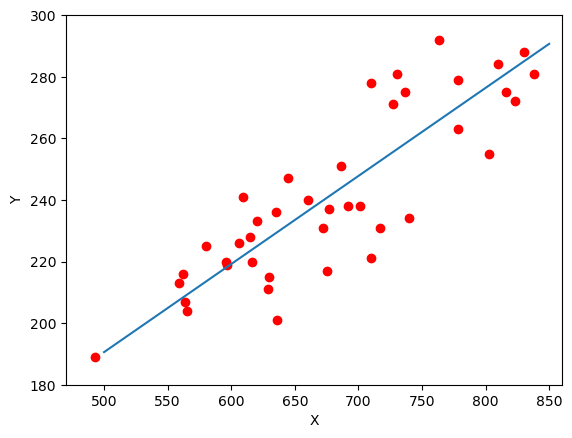

In [92]:
# Visualize data - show features and targets relationships
plt.plot(train_data, train_target, 'ro')
plt.plot(x0, y0)
plt.axis([
    470, 860,
    180, 300,
])
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [93]:
# Predict
y_pred = classifier.predict(test_data)
print('y_pred : ', y_pred)

y_pred :  [[263.50840648]
 [227.47735493]]
